In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [71]:
import fileio
import numpy as np
import seaborn as sns
import keys
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display

In [33]:
X, y = fileio.load_from_range()

In [34]:
X.shape

(661500, 837)

In [35]:
y.shape

(24, 837)

In [36]:
y_keys = np.argmax(y, axis=0)

In [46]:
genres = fileio.GENRES
genre_sizes = fileio.GENRE_SIZES
y_genres = [[genres[ii]]*genre_sizes[ii] for ii in range(len(genres))]
y_genres = [item for sublist in y_genres for item in sublist]

In [52]:
y_key_str = [keys.get_string_from_idx(ii).replace('\t', ' ') for ii in y_keys]

In [53]:
y_labels = pd.DataFrame.from_dict({'genre': y_genres, 'key': y_keys, 
                                   'key_str': y_key_str})

In [64]:
y_labels['majmin'] = ['major' if key < 12 else 'minor' for key in y_labels['key']]

In [65]:
y_labels

,genre,key,key_str,majmin
0,country,3,C major,major
1,country,7,E major,major
2,country,5,D major,major
3,country,2,B major,major
4,country,5,D major,major
5,country,3,C major,major
6,country,6,D# major,major
7,country,8,F major,major
8,country,10,G major,major
9,country,6,D# major,major


In [48]:
def number_countplot(ax=None):
    if ax is None:
        ax = plt.gca()
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:d}'.format(height),
                ha="center") 

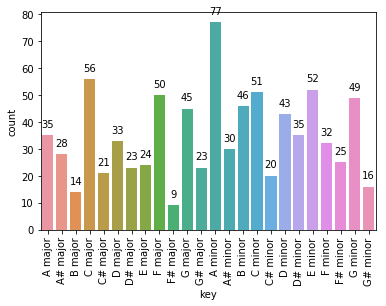

In [56]:
g = sns.countplot(y_labels['key'])
number_countplot()
plt.xticks(range(24), [keys.get_string_from_idx(ii).replace('\t', ' ') for ii in range(24)], rotation=90)
plt.show()

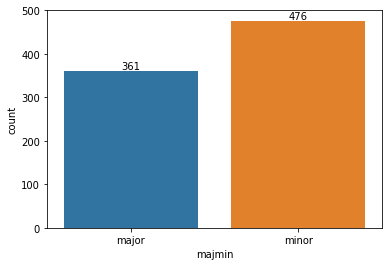

In [66]:
g = sns.countplot(y_labels['majmin'])
number_countplot()
plt.show()

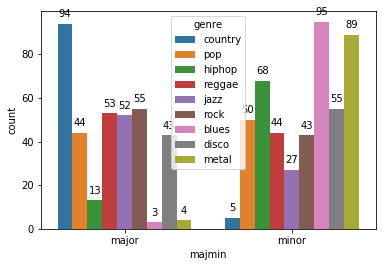

In [67]:
g = sns.countplot('majmin', hue='genre', data=y_labels)
number_countplot()
plt.show()

In [70]:
y_labels

,genre,key,key_str,majmin
0,country,3,C major,major
1,country,7,E major,major
2,country,5,D major,major
3,country,2,B major,major
4,country,5,D major,major
5,country,3,C major,major
6,country,6,D# major,major
7,country,8,F major,major
8,country,10,G major,major
9,country,6,D# major,major


## Play shit!

In [95]:
idx = np.random.choice(X.shape[1])
print(idx)
display.display(y_labels.loc[idx])
display.Audio(X[:, idx], rate=fileio.FS)

575


genre        blues
key             15
key_str    C minor
majmin       minor
Name: 575, dtype: object